In [1]:
import numpy as np
import pandas as pd
import json
import statsmodels.stats.multitest as mt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
gnomad_constraint_v2_1_1 = pd.read_csv('../data/gnomad_v2.2.1_constraint_by_gene.tsv',sep='\t')
gnomad_constraint_v2_1_1

,gene,transcript,obs_mis,exp_mis,oe_mis,mu_mis,possible_mis,obs_mis_pphen,exp_mis_pphen,oe_mis_pphen,...,gene_type,gene_length,exac_pLI,exac_obs_lof,exac_exp_lof,exac_oe_lof,brain_expression,chromosome,start_position,end_position
0,MED13,ENST00000397786,871,1117.80,0.77921,0.000056,14195,314.0,529.750,0.59273,...,protein_coding,122678,1.000000e+00,0.0,64.3930,0.000000,NaN,17,60019966,60142643
1,NIPBL,ENST00000282516,846,1441.50,0.58688,0.000074,18540,158.0,543.100,0.29092,...,protein_coding,189655,1.000000e+00,1.0,110.5700,0.009044,NaN,5,36876861,37066515
2,SMC3,ENST00000361804,178,630.07,0.28251,0.000032,8109,21.0,182.520,0.11506,...,protein_coding,36946,1.000000e+00,0.0,58.5230,0.000000,NaN,10,112327449,112364394
3,CNOT1,ENST00000317147,561,1295.90,0.43290,0.000069,15670,51.0,290.680,0.17545,...,protein_coding,109936,1.000000e+00,3.0,90.1300,0.033285,NaN,16,58553855,58663790
4,RLF,ENST00000372771,669,972.87,0.68766,0.000047,12682,107.0,321.140,0.33319,...,protein_coding,79549,1.000000e+00,0.0,43.6070,0.000000,NaN,1,40627045,40706593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19699,OR7G2,ENST00000305456,177,181.12,0.97723,0.000009,2247,34.0,38.175,0.89064,...,protein_coding,1038,7.093800e-03,3.0,2.9635,1.012300,NaN,19,9212945,9213982
19700,OR7G3,ENST00000305444,164,163.92,1.00050,0.000008,2016,40.0,39.403,1.01520,...,protein_coding,939,4.059600e-01,1.0,4.8401,0.206610,NaN,19,9236688,9237626
19701,OR8D1,ENST00000357821,178,162.04,1.09850,0.000008,2002,65.0,54.179,1.19970,...,protein_coding,1026,2.159200e-01,1.0,2.7436,0.364480,NaN,11,124179708,124180733
19702,ZNF600,ENST00000338230,450,357.84,1.25750,0.000018,4794,138.0,124.070,1.11220,...,protein_coding,22597,1.477300e-13,16.0,9.6420,1.659400,NaN,19,53267448,53290044


In [7]:
gpcrs = pd.read_csv('../../receptors/Ensembl_Grch37_gpcr_genome_locations.csv')
gpcrs

,HGNC symbol,HGNC name,HGNC id,Ensembl Id Grch38,Grch37 symbol,Grch37 chromosome,Grch37 start bp,Grch37 end bp,Human genetic localisation
0,ACKR1,atypical chemokine receptor 1 (Duffy blood group),4035,ENSG00000213088,DARC,1,159173097,159176290,1q23.2
1,ACKR2,atypical chemokine receptor 2,1565,ENSG00000144648,ACKR2,3,42846244,42929466,3p22.1
2,ACKR3,atypical chemokine receptor 3,23692,ENSG00000144476,ACKR3,2,237476430,237491001,2q37.3
3,ACKR4,atypical chemokine receptor 4,1611,ENSG00000129048,ACKR4,3,132316081,132337811,3q22.1
4,ADCYAP1R1,ADCYAP receptor type I,242,ENSG00000078549,ADCYAP1R1,7,31092076,31151089,7p14.3
...,...,...,...,...,...,...,...,...,...
388,TSHR,thyroid stimulating hormone receptor,12373,ENSG00000165409,TSHR,14,81421333,81612646,14q24-q31
389,UTS2R,urotensin 2 receptor,4468,ENSG00000181408,UTS2R,17,80332153,80333462,17q25.3
390,VIPR1,vasoactive intestinal peptide receptor 1,12694,ENSG00000114812,VIPR1,3,42530791,42579059,3p22.1
391,VIPR2,vasoactive intestinal peptide receptor 2,12695,ENSG00000106018,VIPR2,7,158820866,158937649,7q36.3


In [8]:
gpcr_constraint = gpcrs.merge(gnomad_constraint_v2_1_1,how='inner',left_on='Grch37 symbol',right_on='gene')
gpcr_constraint = gpcr_constraint.drop(
    ['Grch37 symbol',
     'Grch37 chromosome',
     'Grch37 start bp',
     'Grch37 end bp',
     'gene'],
    axis=1
)
gpcr_constraint

,HGNC symbol,HGNC name,HGNC id,Ensembl Id Grch38,Human genetic localisation,transcript,obs_mis,exp_mis,oe_mis,mu_mis,...,gene_type,gene_length,exac_pLI,exac_obs_lof,exac_exp_lof,exac_oe_lof,brain_expression,chromosome,start_position,end_position
0,ACKR1,atypical chemokine receptor 1 (Duffy blood group),4035,ENSG00000213088,1q23.2,ENST00000368121,193,174.80,1.10410,0.000009,...,protein_coding,3194,2.736100e-04,5.0,4.3035,1.16190,NaN,1,159173097,159176290
1,ACKR2,atypical chemokine receptor 2,1565,ENSG00000144648,3p22.1,ENST00000422265,205,215.89,0.94954,0.000013,...,protein_coding,83223,3.768900e-04,5.0,4.7509,1.05240,NaN,3,42846244,42929466
2,ACKR3,atypical chemokine receptor 3,23692,ENSG00000144476,2q37.3,ENST00000272928,180,219.42,0.82034,0.000015,...,protein_coding,14572,4.195600e-01,1.0,4.9778,0.20089,NaN,2,237476430,237491001
3,ACKR4,atypical chemokine receptor 4,1611,ENSG00000129048,3q22.1,ENST00000249887,147,178.74,0.82244,0.000009,...,protein_coding,21731,7.445100e-03,4.0,6.4933,0.61602,NaN,3,132316081,132337811
4,ADCYAP1R1,ADCYAP receptor type I,242,ENSG00000078549,7p14.3,ENST00000396211,219,285.11,0.76813,0.000016,...,protein_coding,59014,1.334800e-03,9.0,23.2660,0.38682,NaN,7,31092076,31151089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,TSHR,thyroid stimulating hormone receptor,12373,ENSG00000165409,14q24-q31,ENST00000541158,389,408.01,0.95341,0.000023,...,protein_coding,191314,5.803400e-06,11.0,17.8800,0.61521,NaN,14,81421333,81612646
388,UTS2R,urotensin 2 receptor,4468,ENSG00000181408,17q25.3,ENST00000313135,205,235.14,0.87181,0.000017,...,protein_coding,1310,1.801900e-05,6.0,3.6949,1.62390,NaN,17,80332153,80333462
389,VIPR1,vasoactive intestinal peptide receptor 1,12694,ENSG00000114812,3p22.1,ENST00000325123,259,262.00,0.98856,0.000016,...,protein_coding,48269,8.275300e-10,15.0,16.6320,0.90186,NaN,3,42530791,42579059
390,VIPR2,vasoactive intestinal peptide receptor 2,12695,ENSG00000106018,7q36.3,ENST00000262178,230,242.41,0.94881,0.000014,...,protein_coding,116784,9.343800e-07,13.0,21.6850,0.59949,NaN,7,158820866,158937649


In [9]:
gpcr_constraint.to_csv('../data/gnomad_v2.1.1_gpcr_constraint.csv')

In [10]:
gpcr_constraint.columns

Index(['HGNC symbol', 'HGNC name', 'HGNC id', 'Ensembl Id Grch38',
       'Human genetic localisation', 'transcript', 'obs_mis', 'exp_mis',
       'oe_mis', 'mu_mis', 'possible_mis', 'obs_mis_pphen', 'exp_mis_pphen',
       'oe_mis_pphen', 'possible_mis_pphen', 'obs_syn', 'exp_syn', 'oe_syn',
       'mu_syn', 'possible_syn', 'obs_lof', 'mu_lof', 'possible_lof',
       'exp_lof', 'pLI', 'pNull', 'pRec', 'oe_lof', 'oe_syn_lower',
       'oe_syn_upper', 'oe_mis_lower', 'oe_mis_upper', 'oe_lof_lower',
       'oe_lof_upper', 'constraint_flag', 'syn_z', 'mis_z', 'lof_z',
       'oe_lof_upper_rank', 'oe_lof_upper_bin', 'oe_lof_upper_bin_6',
       'n_sites', 'classic_caf', 'max_af', 'no_lofs', 'obs_het_lof',
       'obs_hom_lof', 'defined', 'p', 'exp_hom_lof', 'classic_caf_afr',
       'classic_caf_amr', 'classic_caf_asj', 'classic_caf_eas',
       'classic_caf_fin', 'classic_caf_nfe', 'classic_caf_oth',
       'classic_caf_sas', 'p_afr', 'p_amr', 'p_asj', 'p_eas', 'p_fin', 'p_nfe',
       'p

In [17]:
(gpcr_constraint['oe_mis_upper'] < 0.9).sum()

118

In [18]:
(gpcr_constraint['oe_lof_upper'] < 0.9).sum()

141

In [24]:
(gpcr_constraint.obs_hom_lof>0).sum()

58

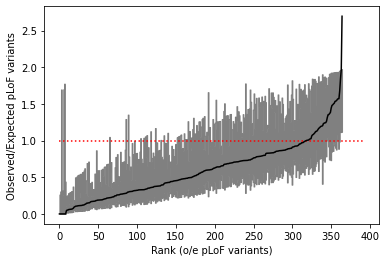

In [13]:
df = gpcr_constraint.sort_values('oe_lof')
constraint = df['oe_lof']
constraint_ub = df['oe_lof_upper']
constraint_lb = df['oe_lof_lower']
gene = df['HGNC symbol']
rank = np.arange(len(constraint))

plt.fill_between(x=rank,y1=constraint_lb,y2=constraint_ub,step='pre',color='grey')
plt.plot(rank,constraint,color='k')
plt.hlines(1,0,len(constraint),colors='red',linestyles='dotted')
plt.xlabel('Rank (o/e pLoF variants)')
plt.ylabel('Observed/Expected pLoF variants')
plt.savefig('../plots/oe_plof_distribution.png')

In [ ]:
df = gpcr_constraint.sort_values('oe_mis')
constraint = df['oe_mis']
constraint_ub = df['oe_mis_upper']
constraint_lb = df['oe_mis_lower']
gene = df['HGNC']
rank = np.arange(len(constraint))

plt.fill_between(x=rank,y1=constraint_lb,y2=constraint_ub,step='pre',color='grey')
plt.plot(rank,constraint,color='k')
plt.hlines(1,0,len(constraint),colors='red',linestyles='dotted')
plt.xlabel('Rank (o/e missense variants)')
plt.ylabel('Observed/Expected missense variants')
plt.savefig('../plots/oe_missense_distribution.png')

In [ ]:
df = gpcr_constraint.sort_values('oe_syn')
constraint = df['oe_syn']
constraint_ub = df['oe_syn_upper']
constraint_lb = df['oe_syn_lower']
gene = df['gene']
rank = np.arange(len(constraint))


plt.fill_between(x=rank,y1=constraint_lb,y2=constraint_ub,step='pre',color='grey')
plt.plot(rank,constraint,color='k')
plt.hlines(1,0,len(constraint),colors='red',linestyles='dotted')
plt.xlabel('Rank (o/e synonymous variants)')
plt.ylabel('Observed/Expected synonymous variants')
plt.savefig('plots/oe_synonymous_distribution.png')

In [ ]:
gpcr_constraint['oe_lof_upper'].plot(kind='hist',bins=50)

In [ ]:
gpcr_constraint['oe_mis_upper'].plot(kind='kde',bins=50)

In [ ]:
gpcr_constraint['gene'][gpcr_constraint['oe_lof_upper']<0.9].to_csv('data/gpcrs_constrained_loeuf.csv')

In [ ]:
gpcr_constraint['gene'][gpcr_constraint['oe_mis_upper']<0.9].to_csv('data/gpcrs_constrained_oe_mis.csv')

In [ ]:
gpcr_constraint['gene'][(gpcr_constraint['oe_lof_upper']<0.9) & (gpcr_constraint['oe_mis_upper']<0.9)].count()

In [ ]:
gpcr_variants = pd.read_csv('data/gnomadv2.1.1_gpcr_variants.csv',low_memory=False,index_col=0)
gpcr_variants.head()